<a href="https://colab.research.google.com/github/Henriquerezer/Machine_Learning/blob/main/Desafio_INDICIUM/Processamento_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importação dos dados

In [2]:
treino = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/Machine_Learning/main/Desafio_INDICIUM/wage_train.csv')


treino['yearly_wage'] = treino['yearly_wage'].map({' <=50K': 1, ' >50K': 0})
treino = treino.drop('Unnamed: 0', axis = 1)

treinoX = treino.drop('yearly_wage', axis = 1)
treinoy = treino['yearly_wage']
treino.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1


# SELEÇÃO DE VARIÁVEIS

In [3]:
treino['native_country'].unique()
#Devemos tomar cuidado que todos nomes, possuem um espaço em branco antes da primeira letra

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [4]:
origX = treino.drop('yearly_wage', axis = 1)
origy = treino['yearly_wage']

#tratamento de variáveis para o teste 
#Substituindo os valores por valores numéricos 

origX['workclass']        = origX['workclass'].map({' Self-emp-not-inc' :0,  ' Private' :1, ' State-gov' :2, ' Federal-gov' :3,' Local-gov' :4, ' ?' :5, ' Self-emp-inc' :6, ' Without-pay' :7,' Never-worked' :8 })
origX['education']        = origX['education'].map({' Bachelors' :0, ' HS-grad' :1, ' 11th' :2, ' Masters' :3, ' 9th' :4,' Some-college' :5, ' Assoc-acdm' :6, ' Assoc-voc' :7, ' 7th-8th' :8,' Doctorate' :9, ' Prof-school' :10, ' 5th-6th' :11, ' 10th' :12, ' 1st-4th' :13,' Preschool' :14, ' 12th' :15})
origX['marital_status']   = origX['marital_status'].map({' Married-civ-spouse' :0, ' Divorced' :1, ' Married-spouse-absent' :2,' Never-married' :3, ' Separated' :4, ' Married-AF-spouse' :5, ' Widowed' :6})
origX['occupation']       = origX['occupation'].map({' Exec-managerial' :0, ' Handlers-cleaners' :1, ' Prof-specialty' :2,' Other-service' :3, ' Adm-clerical' :4, ' Sales' :5, ' Craft-repair':6,' Transport-moving' :7, ' Farming-fishing' :8, ' Machine-op-inspct' :9, ' Tech-support' :10, ' ?' :11, ' Protective-serv' :12, ' Armed-Forces' :13, ' Priv-house-serv' :14})
origX['relationship']     = origX['relationship'].map({' Husband' :0, ' Not-in-family' :1, ' Wife' :2, ' Own-child' :3, ' Unmarried' :4,' Other-relative' :5})
origX['race']             = origX['race'].map({' White' :0, ' Black' :1, ' Asian-Pac-Islander' :2, ' Amer-Indian-Eskimo' :3,' Other' :4})
origX['sex']              = origX['sex'].map({' Male' :0, ' Female' :1})
origX['native_country']   = origX['native_country'].map({' United-States' :0, ' Cuba' :1, ' Jamaica':2, ' India' :3, ' ?' :4, ' Mexico' :5,' South' :6, ' Puerto-Rico' :7, ' Honduras' :8, ' England' :9, ' Canada' :10,' Germany' :11, ' Iran' :12, ' Philippines' :13, ' Italy' :14, ' Poland' :15,' Columbia' :16, ' Cambodia' :17, ' Thailand' :18, ' Ecuador' :19, ' Laos' :20,' Taiwan' :21, ' Haiti' :22, ' Portugal' :23, ' Dominican-Republic' :24,' El-Salvador' :25, ' France' :26, ' Guatemala' :27, ' China' :28, ' Japan' :29,' Yugoslavia' :30, ' Peru' :31, ' Outlying-US(Guam-USVI-etc)' :32, ' Scotland' :33,' Trinadad&Tobago' :34, ' Greece' :35, ' Nicaragua' :36, ' Vietnam' :37, ' Hong' :38,' Ireland' :39, ' Hungary' :40, ' Holand-Netherlands' :41})

from sklearn.ensemble import RandomForestClassifier

modelo_base = RandomForestClassifier(max_depth = 5)
modelo_base.fit(origX, origy)

RandomForestClassifier(max_depth=5)

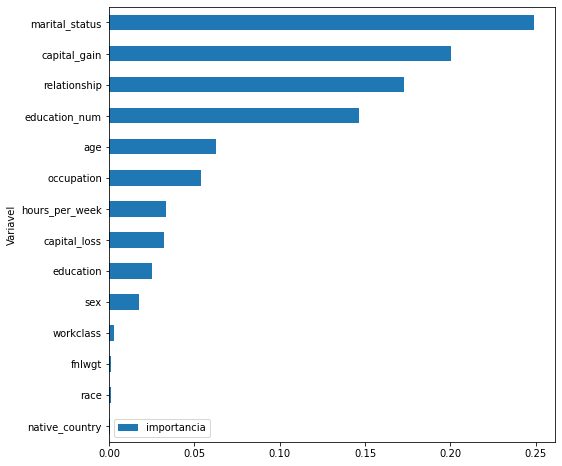

In [5]:
variaveis = pd.DataFrame()
variaveis['Variavel'] = origX.columns
variaveis['importancia'] = modelo_base.feature_importances_
variaveis.sort_values(by = 'importancia', ascending = True, inplace = True)
variaveis.set_index('Variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(8,8))

In [6]:
origX.drop('race', axis = 1, inplace = True)
origX.drop('native_country', axis = 1, inplace = True)

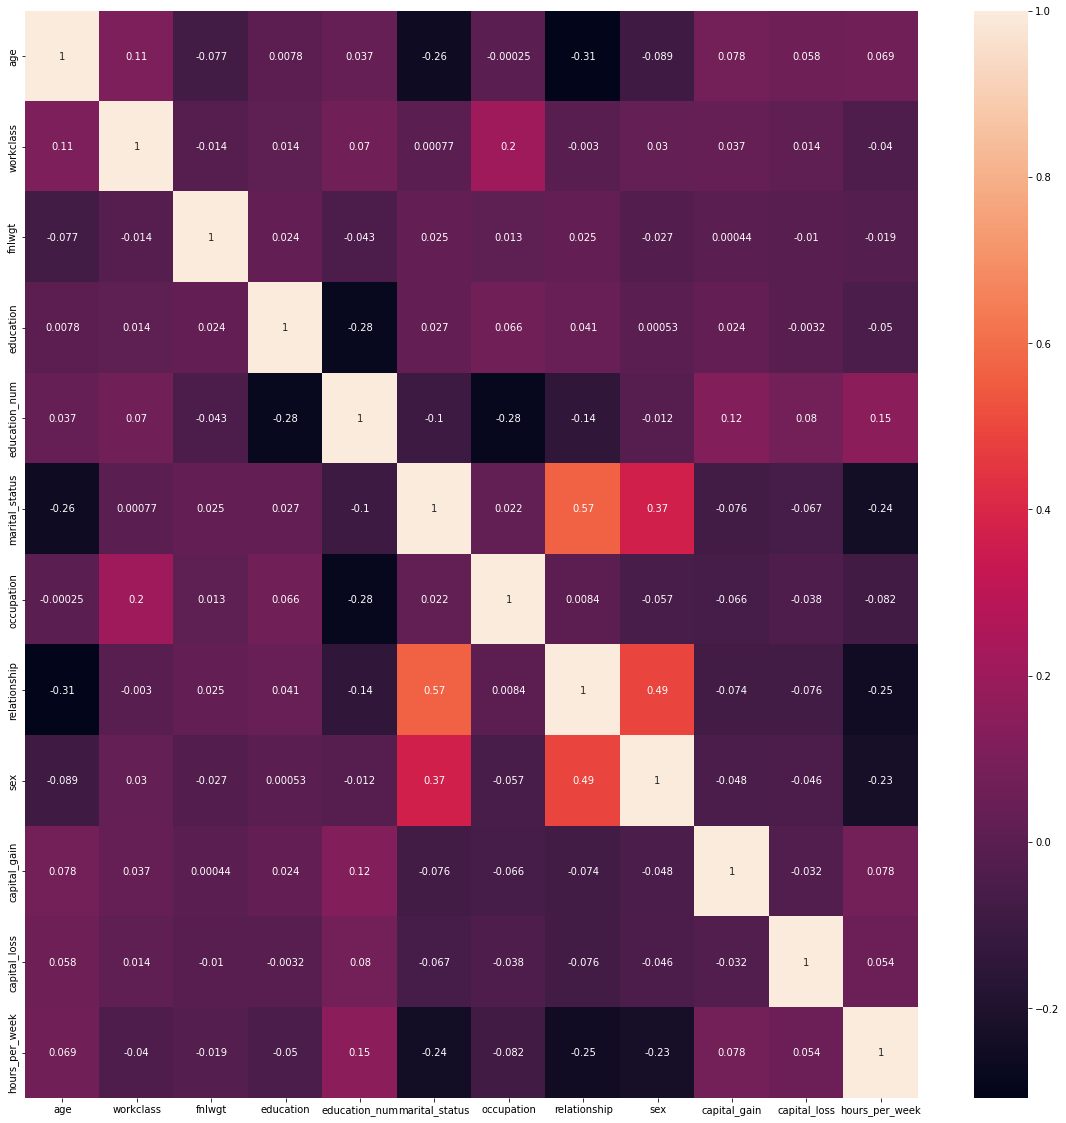

In [7]:
#Verificando se há correlação entre as variáveis selecionadas
import seaborn as sns
plt.figure(figsize = [20,20])
sns.heatmap(origX.corr(),annot = True);

# Transformação

In [8]:
#Definindo uma função para realizar a transformação.
def Transf(dados):
  #Remoção das variaveis que não serão utilizadas
  dados.drop('race', axis = 1, inplace = True)
  dados.drop('native_country', axis = 1, inplace = True)

  #Transformação de variáveis categóricas para numéricas
  dados['workclass']        = dados['workclass'].map({' Self-emp-not-inc' :0,  ' Private' :1, ' State-gov' :2, ' Federal-gov' :3,' Local-gov' :4, ' ?' :5, ' Self-emp-inc' :6, ' Without-pay' :7,' Never-worked' :8 })
  dados['education']        = dados['education'].map({' Bachelors' :0, ' HS-grad' :1, ' 11th' :2, ' Masters' :3, ' 9th' :4,' Some-college' :5, ' Assoc-acdm' :6, ' Assoc-voc' :7, ' 7th-8th' :8,' Doctorate' :9, ' Prof-school' :10, ' 5th-6th' :11, ' 10th' :12, ' 1st-4th' :13,' Preschool' :14, ' 12th' :15})
  dados['marital_status']   = dados['marital_status'].map({' Married-civ-spouse' :0, ' Divorced' :1, ' Married-spouse-absent' :2,' Never-married' :3, ' Separated' :4, ' Married-AF-spouse' :5, ' Widowed' :6})
  dados['occupation']       = dados['occupation'].map({' Exec-managerial' :0, ' Handlers-cleaners' :1, ' Prof-specialty' :2,' Other-service' :3, ' Adm-clerical' :4, ' Sales' :5, ' Craft-repair':6,' Transport-moving' :7, ' Farming-fishing' :8, ' Machine-op-inspct' :9, ' Tech-support' :10, ' ?' :11, ' Protective-serv' :12, ' Armed-Forces' :13, ' Priv-house-serv' :14})
  dados['relationship']     = dados['relationship'].map({' Husband' :0, ' Not-in-family' :1, ' Wife' :2, ' Own-child' :3, ' Unmarried' :4,' Other-relative' :5})
# dados['race']             = dados['race'].map({' White' :0, ' Black' :1, ' Asian-Pac-Islander' :2, ' Amer-Indian-Eskimo' :3,' Other' :4})
  dados['sex']              = dados['sex'].map({' Male' :0, ' Female' :1})
# dados['native_country']   = dados['native_country'].map({' United-States' :0, ' Cuba' :1, ' Jamaica':2, ' India' :3, ' ?' :4, ' Mexico' :5,' South' :6, ' Puerto-Rico' :7, ' Honduras' :8, ' England' :9, ' Canada' :10,' Germany' :11, ' Iran' :12, ' Philippines' :13, ' Italy' :14, ' Poland' :15,' Columbia' :16, ' Cambodia' :17, ' Thailand' :18, ' Ecuador' :19, ' Laos' :20,' Taiwan' :21, ' Haiti' :22, ' Portugal' :23, ' Dominican-Republic' :24,' El-Salvador' :25, ' France' :26, ' Guatemala' :27, ' China' :28, ' Japan' :29,' Yugoslavia' :30, ' Peru' :31, ' Outlying-US(Guam-USVI-etc)' :32, ' Scotland' :33,' Trinadad&Tobago' :34, ' Greece' :35, ' Nicaragua' :36, ' Vietnam' :37, ' Hong' :38,' Ireland' :39, ' Hungary' :40, ' Holand-Netherlands' :41})

  #normalização dos dados, mantendo os dados em uma escala de 0 a 1
  dados['fnlwgt']           = dados['fnlwgt'] / 1.48e6
  dados['education_num']    = dados['education_num'] / 16
  dados['hours_per_week']   = dados['hours_per_week'] / 99
  dados['capital_gain']     = dados['capital_gain'] / 99999
  dados['capital_loss']     = dados['capital_loss'] / 4356
  dados['age']              = dados['age'] / 90
  
  #Dummyficação das variáveis que transformamos em numéricas
  variaveis_para_Dummie     = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'sex']
  dados = pd.get_dummies(dados, columns = variaveis_para_Dummie, drop_first = True)

  return dados

#Aplicando a função

In [9]:
treinoX = Transf(treinoX)

# dados salvos após tratamento


In [10]:
treinoX.to_csv('yearly_wage_tratado', index = False)

# Modelo randomForestClassifier

Modelo para comparação

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(treinoX, treinoy, test_size = 0.3)

In [12]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)
pred = modelo.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('accuracy : ', accuracy)

accuracy :  0.8549344799344799


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[1514,  856],
       [ 561, 6837]])

In [14]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.73      0.64      0.68      2370
     class 1       0.89      0.92      0.91      7398

    accuracy                           0.85      9768
   macro avg       0.81      0.78      0.79      9768
weighted avg       0.85      0.85      0.85      9768



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


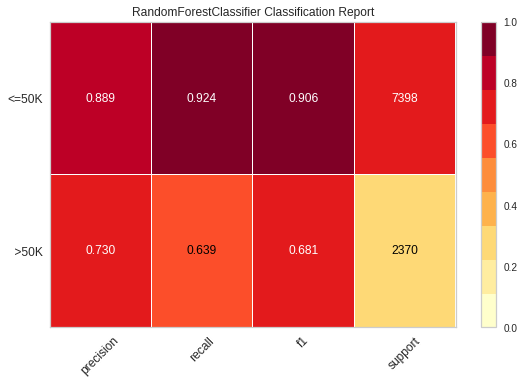

In [15]:
from yellowbrick.classifier import ClassificationReport

classes = [" >50K", "<=50K"]

visualizer = ClassificationReport(modelo, classes=classes, support=True)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()                       

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


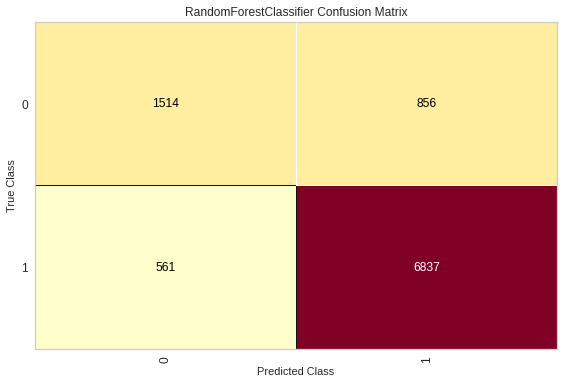

In [16]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(modelo, classes=[0,1])

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show();